In [1]:
import sys

sys.path.append('/home/alta/Conversational/OET/al826/2022/conv_frameworks/parallel_exp')

In [2]:
from src.config import config
from src.helpers import ConvHandler
from src.models import SystemHandler


C = ConvHandler(transformer='bert', 
                filters=None)

batcher = SystemHandler.batcher(
                system='whole',
                formatting=None,
                max_len=None, 
                ctx_window=[500,500], 
                C=C)

train = C.prepare_data(path='swda/standard/train.json')
train_b = batcher(data=train, bsz=1, shuffle=True)

100%|██████████| 1115/1115 [00:16<00:00, 69.37it/s]


In [4]:
import time

lens = []
for k, b in enumerate(train_b):
    lens.append(b.ids.shape[1])


<AxesSubplot:ylabel='Count'>

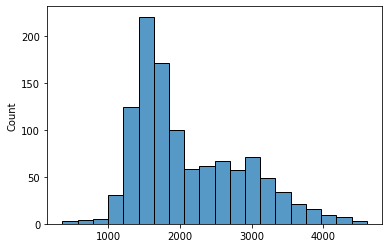

In [6]:
import seaborn as sns

sns.histplot(lens)